In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
%%HTML
<img src="quartile.png">
<a href="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51" target="_blank">src</a>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f21f76b3400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f21f76b3ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f21f76b32b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f21f76ca198>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f21f76ca4e0>,
 'means': []}

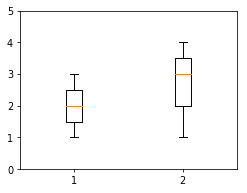

In [3]:
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
plt.axis([0, 5, 0, 5])
y1 = (1, 2, 3)
y2 = (4, 3, 1)

plt.boxplot([y1, y2])

#### calculate percentile

In [4]:
a = np.array([10,12,23])
np.percentile(a, 50) # return 50th percentile, e.g median.

12.0

In [5]:
np.percentile(a, 99)

22.78

In [6]:
np.percentile(a, 99.5)

22.89

#### multiple groups

In [7]:
# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data1 = np.concatenate((spread, center, flier_high, flier_low))

spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
data1.shape = (-1, 1)
d2.shape = (-1, 1)

In [8]:
data1.flatten().shape, d2[::2,0].shape, d2.shape

((95,), (48,), (95, 1))

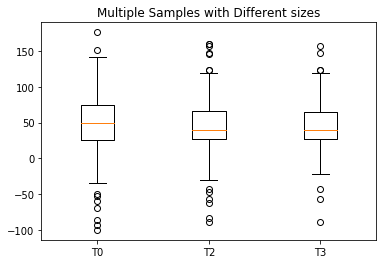

In [9]:
# https://stackoverflow.com/a/54651370/2803344
data = [data1.flatten(), d2.flatten(), d2[::2,0]]
fig, ax = plt.subplots()
ax.set_title('Multiple Samples with Different sizes')
ax.boxplot(data)
ax.set_xticklabels(['T0', 'T2', 'T3'], fontsize=10)
plt.show()

#### add statistical annotation to a Seaborn box plot
- https://stackoverflow.com/a/37518947/2803344

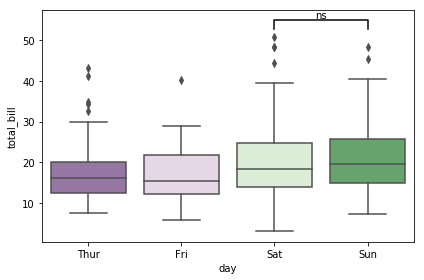

In [10]:
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=tips, palette="PRGn")

# statistical annotation
x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = tips['total_bill'].max() + 2, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)
plt.tight_layout()
plt.show()